# Ford GoBike System Data
## by Sphoorti Metri 

## Investigation Overview

This project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis process.This a short presentation that illustrates interesting properties, trends, and relationships that I doscovered in this dataset. 

## Dataset Overview

The dataset consists of Bay Wheels's trip data. It has 1732358 entries and 16 features. It has data about bike riders age, gender, start_time, station_name, etc.The dataset can be found on Ford GoBike website.(https://s3.amazonaws.com/fordgobike-data/index.html). I downloaded 2018 data from the website and stored them in corresponding comma separated files. I combined them into a single dataframe for further analysis


In [2]:
# import all packages and set plots to be embedded inline
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
from zipfile import ZipFile

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Number of bikes over time 


Overall, the number of bikes have increased over the months 2018, with a slight decrease during November

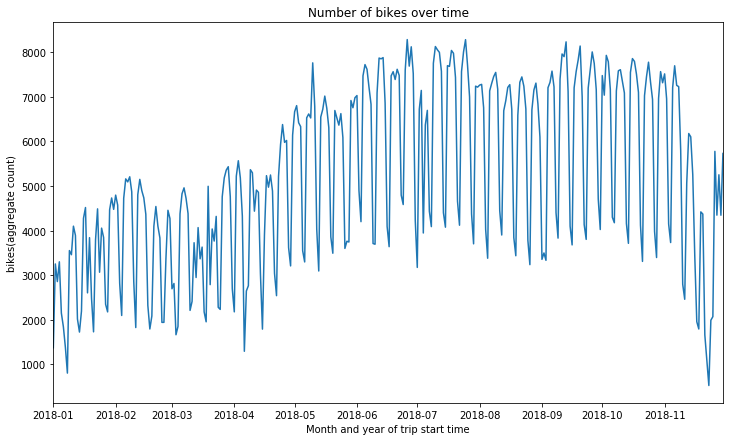

In [11]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_time_date'] = df['start_time'].apply(lambda x:x.date())
df.groupby('start_time_date').agg({'bike_id':'count'}).plot(style='-', legend=False, figsize=(12,7))
plt.title('Number of bikes over time') 
plt.ylabel('bikes(aggregate count)')
plt.xlabel('Month and year of trip start time');

## Bike rides by time_of_day over months 

I divided the days in the datset into parts of day(morning, afternoon, evening, night). Grouped over months, afternoon and morning(slightly lower than afternoon) are busier than evening and nights 

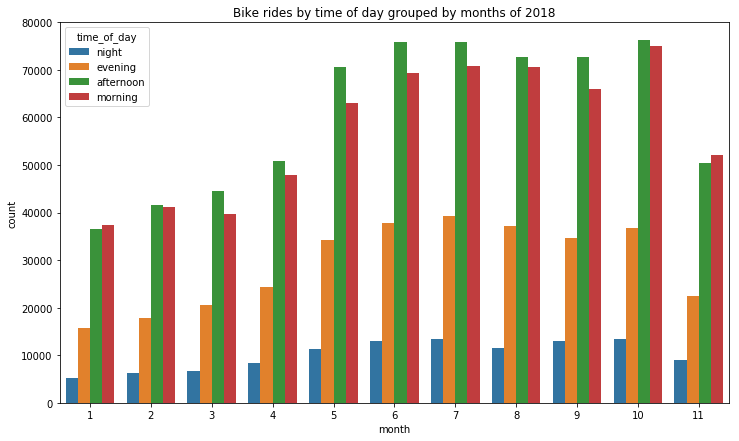

In [6]:
def get_time_of_day(hour):
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 20
        else
        "night"
    )

plt.figure(figsize=(12,7))
df['time_of_day'] = df['start_time'].apply(lambda x:x.time().hour)
df['time_of_day'] = df['time_of_day'].apply(get_time_of_day)
df['month'] = df['start_time'].apply(lambda x:x.date().month)
sb.countplot(data = df, x = 'month', hue = 'time_of_day')
plt.title('Bike rides by time of day grouped by months of 2018');

## Peak hours 

8:30 AM and 5:30 PM are the peak hours of the day 


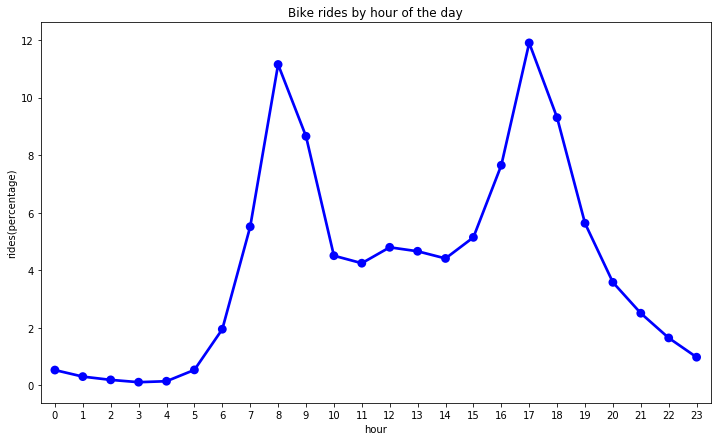

In [8]:
def get_hour(x):
    return x.time().hour
df['hour'] =df['start_time'].apply(get_hour)

hour_df = df.groupby('hour').agg({'bike_id':'count'}).reset_index()
hour_df['bike_id'] = (hour_df['bike_id']/hour_df['bike_id'].sum())*100
plt.figure(figsize=(12,7))
sb.pointplot(data=hour_df, x='hour', y='bike_id', color='blue')
plt.title('Bike rides by hour of the day')
plt.xlabel('hour')
plt.ylabel('rides(percentage)');

### Bike rides of subscribers vs customers distributed over months of 2018

Subscribers are higher in number compared to customers. Subscribers increase in number until october and decrease thereafter. Customers increase in number upto July and slightly decrease from there on 

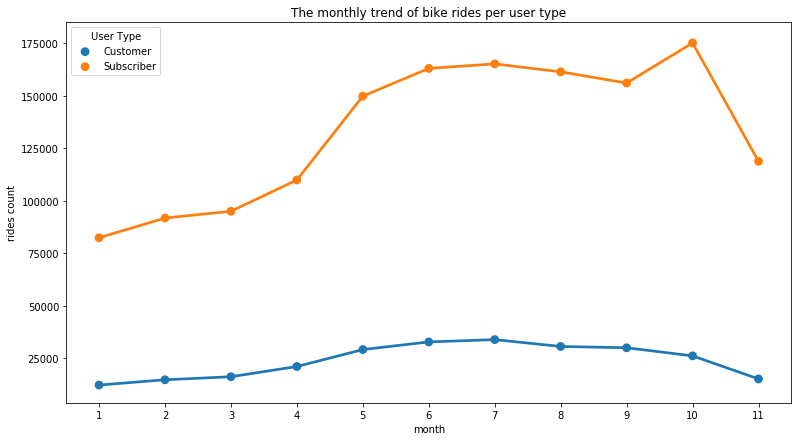

In [9]:
user_type_per_month = df.groupby(["month", "user_type"]).size().reset_index()

plt.figure(figsize=(13,7))
ax = sb.pointplot(x='month', y=0, hue='user_type', data=user_type_per_month)
plt.title('The monthly trend of bike rides per user type')
plt.xlabel('month')
plt.ylabel('rides count')
leg = ax.legend()
leg.set_title('User Type')

## Trends of bike rides of each age group over the months

age_group 1 seem to be the ones using this service the most whereas age_group 4 is the group using it the least 

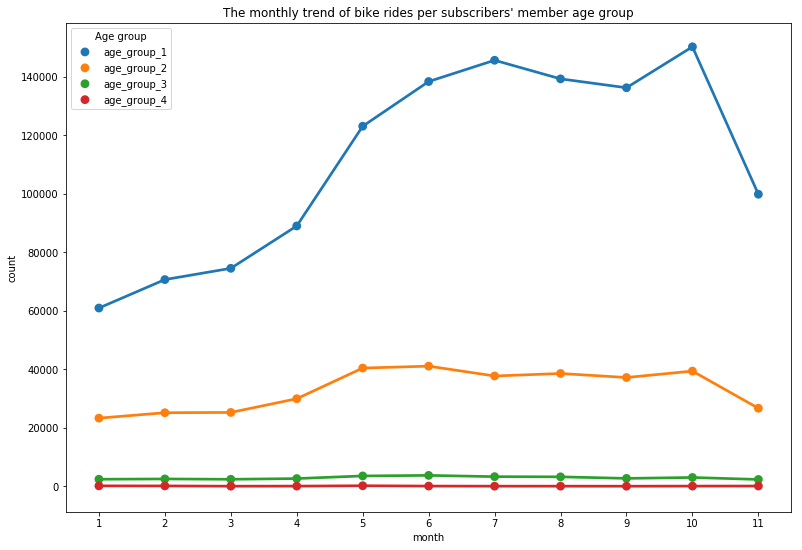

In [10]:
def age_group(age): 
    if 18 <= age <= 40: 
        return 'age_group_1'
    elif 40 < age <= 60: 
        return 'age_group_2'
    elif 60 < age <= 80:
        return 'age_group_3'
    elif 80 < age <= 100:
        return 'age_group_4'

df['age'] = 2018 - df['member_birth_year']
df['age_group'] = df['age'].apply(age_group)
age_df = df.groupby(['month','age_group'])['bike_id'].agg({'bike_id':'count'}).reset_index()
plt.figure(figsize=(13,9))
ax = sb.pointplot(x='month', y='bike_id', hue='age_group', data = age_df)
plt.title("The monthly trend of bike rides per subscribers' member age group")
plt.xlabel('month')
plt.ylabel('count')
leg = ax.legend()
leg.set_title('Age group')